# **Tame your python**

Let's see some classifiers in action

`Leggo`

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Visualising the results
def plot_model(classifier, X_set, y_set, y_test, y_pred, text):
  from matplotlib.colors import ListedColormap
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('pink', 'cyan')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
  plt.title(text)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.legend()
  plt.show()

In [0]:
def preprocess(X_train, X_test):
  from sklearn.decomposition import PCA
  pca = PCA(n_components = 2)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  # Feature Scaling
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return X_train, X_test

## Get Breast Cancer Dataset

In [0]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [0]:
def draw_learning_curves(X, y, classifier):
  from sklearn.model_selection import learning_curve
  train_sizes, train_scores, test_scores = learning_curve(classifier, X, y)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()
  plt.title("Learning Curves")
  plt.xlabel("Training examples")
  plt.ylabel("Score")
  plt.plot(train_scores_mean, 'o-', color="b", label="Training Score")
  plt.plot(test_scores_mean, 'o-', color="r", label="Cross Validation Score")
  plt.legend()
  plt.show()

In [28]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
X = data.data
y = data.target

In [0]:
def grid_svm_classification(params, X, y):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  from sklearn.model_selection import GridSearchCV
  from sklearn.metrics import make_scorer
  from sklearn.metrics import f1_score
  scoring_obj = make_scorer(f1_score)
  X_train, X_test = preprocess(X_train, X_test)
  from sklearn.svm import SVC
  classifier = SVC()
  grid_obj = GridSearchCV(classifier, params, scoring=scoring_obj)
  grid_fit_obj = grid_obj.fit(X_train, y_train)
  best_classifier = grid_fit_obj.best_estimator_
  y_pred = best_classifier.predict(X_test)
  y_pred = np.round(y_pred).flatten()
  plot_model(best_classifier, X_train, y_train, y_test, y_pred, "SVC")
  draw_learning_curves(X_train, y_train, best_classifier)
  return best_classifier

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


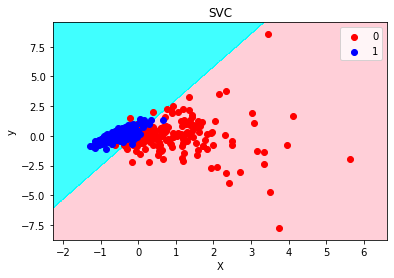

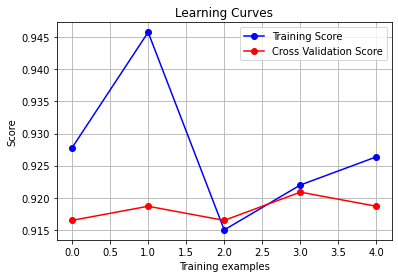

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
grid_svm_classification({'kernel':['linear']}, X, y)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


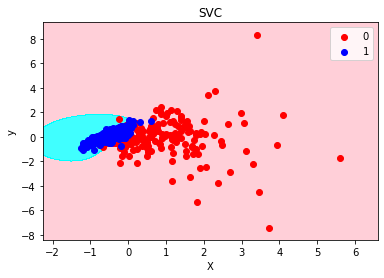

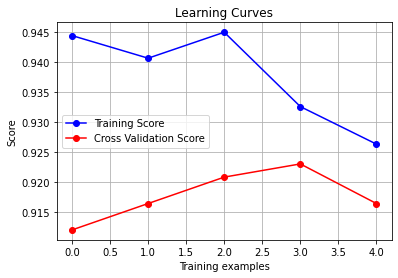

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
grid_svm_classification({'kernel':['poly', 'rbf', 'linear', 'sigmoid']}, X, y)